In [4]:
# import required libraries

from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
# Link of website for scrapping

URL = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_India'

In [58]:
response = requests.get(URL)

In [59]:
# To get response

response

<Response [200]>

In [60]:
# To get html text

soup = BeautifulSoup(response.text,'html')

In [61]:
# Capture the requried table

table = soup.find_all('table')[1]

In [62]:
# To gather column data

head = table.find_all('th')

In [63]:
# To remove the unwanted space in text

col_name = [co_head.text.strip() for co_head in head]

In [64]:
col_name

['Rank',
 'Name',
 'Industry',
 'Revenue(in  ₹ Crore)',
 'Revenue growth',
 'Profits(in  ₹ Crore)',
 'Headquarters',
 'State Controlled']

In [65]:
# Convert the data into DataFrame

top_50 = pd.DataFrame(columns = col_name)

In [66]:
top_50

,Rank,Name,Industry,Revenue(in ₹ Crore),Revenue growth,Profits(in ₹ Crore),Headquarters,State Controlled


In [67]:
# Extract table row data from required data

column_data = table.find_all('tr')

In [68]:
# Collect the row data and insert into DataFrame

for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]

    length = len(top_50)
    top_50.loc[length] = individual_row_data

In [84]:
# Top 5 rows from DataFrame

top_50

In [71]:
# Export this file as Web_scrape in local disk

top_50 = top_50.to_csv(r"E:\BA projects\web_scrape.csv",index = False)

In [2]:
# Clean the unrecognisable value of csv file in excel

In [5]:
# Retrive csv file and declare as df

df = pd.read_csv(r"E:\BA projects\web_scrape.csv")

In [71]:
# To identify null value and Datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rank               50 non-null     int64 
 1   Name               50 non-null     object
 2   Industry           50 non-null     object
 3   Revenue(in Crore)  50 non-null     object
 4   Revenue growth     50 non-null     object
 5   Profits(in Crore)  50 non-null     object
 6   Headquarters       50 non-null     object
 7   State Controlled   20 non-null     object
dtypes: int64(1), object(7)
memory usage: 3.3+ KB


In [6]:
# Rename the Columns for convienience

df.rename(columns = {'Revenue(in Crore)':'Revenue_in_crore','Profits(in Crore)':'Profits_in_crore'},inplace = True)

In [73]:
df.head(10)

,Rank,Name,Industry,Revenue_in_crore,Revenue growth,Profits_in_crore,Headquarters,State Controlled
0,1,Indian Oil Corporation,Oil and gas,"4,24,321",13.20%,"22,189",New Delhi,Yes
1,2,Reliance Industries Limited,Oil and gas,"4,10,295",28.20%,"36,075",Mumbai,NaN
2,3,Oil and Natural Gas Corporation,Oil and gas,"3,33,143",11.00%,"22,106",New Delhi,Yes
3,4,State Bank of India,Banking,"3,06,528",2.60%,"-4,556",Mumbai,Yes
4,5,Tata Motors,Automotive,"3,01,175",7.90%,"8,989",Mumbai,NaN
5,6,Bharat Petroleum,Oil and gas,"2,38,638",13.70%,"9,009",Mumbai,Yes
6,7,Hindustan Petroleum,Oil and gas,"2,21,693",13.40%,"7,218",Mumbai,Yes
7,8,Rajesh Exports,Gems and jewellery,"1,87,748",22.50%,"1,266",Bangalore,NaN
8,9,Tata Steel,Iron and steel,"1,47,192",25.30%,"13,434",Mumbai,NaN
9,10,Coal India,Metals and mining,"1,32,897",5.30%,"7,020",Kolkata,Yes


In [7]:
# Convert Numeric data into float or int

df['Revenue growth'] = df['Revenue growth'].str.strip('%').astype(float)
df['Revenue_in_crore'] = df['Revenue_in_crore'].str.replace(',','').astype(int)
df['Profits_in_crore'] = df['Profits_in_crore'].str.replace(',','').astype(int)

In [75]:
# For verifying

df.head(2)

,Rank,Name,Industry,Revenue_in_crore,Revenue growth,Profits_in_crore,Headquarters,State Controlled
0,1,Indian Oil Corporation,Oil and gas,424321,13.2,22189,New Delhi,Yes
1,2,Reliance Industries Limited,Oil and gas,410295,28.2,36075,Mumbai,NaN


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              50 non-null     int64  
 1   Name              50 non-null     object 
 2   Industry          50 non-null     object 
 3   Revenue_in_crore  50 non-null     int32  
 4   Revenue growth    50 non-null     float64
 5   Profits_in_crore  50 non-null     int32  
 6   Headquarters      50 non-null     object 
 7   State Controlled  20 non-null     object 
dtypes: float64(1), int32(2), int64(1), object(4)
memory usage: 2.9+ KB


In [77]:
# Descriptive statistics

df.describe()

,Rank,Revenue_in_crore,Revenue growth,Profits_in_crore
count,50.00000,50.000000,50.000000,50.000000
mean,25.50000,103652.620000,14.180000,6466.380000
std,14.57738,98310.696233,11.101719,8457.129594
min,1.00000,30599.000000,0.400000,-12130.000000
25%,13.25000,43705.750000,5.550000,1696.000000
50%,25.50000,58051.500000,12.850000,6142.000000
75%,37.75000,120063.250000,19.725000,8922.000000
max,50.00000,424321.000000,54.900000,36075.000000


In [8]:
# NaN() values

df_empty = df[df['State Controlled'].isnull()]
df_empty

,Rank,Name,Industry,Revenue_in_crore,Revenue growth,Profits_in_crore,Headquarters,State Controlled
1,2,Reliance Industries Limited,Oil and gas,410295,28.2,36075,Mumbai,NaN
4,5,Tata Motors,Automotive,301175,7.9,8989,Mumbai,NaN
7,8,Rajesh Exports,Gems and jewellery,187748,22.5,1266,Bangalore,NaN
8,9,Tata Steel,Iron and steel,147192,25.3,13434,Mumbai,NaN
10,11,Tata Consultancy Services,Infotech,126745,3.6,25826,Mumbai,NaN
11,12,Larsen & Toubro,Capital goods,122743,10.6,7370,Mumbai,NaN
12,13,Hindalco Industries,Metals and mining,120428,15.5,6083,Mumbai,NaN
13,14,ICICI Bank,Banking,118969,4.9,7712,Mumbai,NaN
14,15,Vedanta Resources,Metals and mining,102192,30.8,10342,"London, UK",NaN
15,16,HDFC Bank,Banking,101344,17.6,18510,Mumbai,NaN


In [11]:
# Replace NaN value with 'No' in existing dataset (df)

df.fillna('No',inplace = True)

In [14]:
# To check null value

df['State Controlled'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50 entries, 0 to 49
Series name: State Controlled
Non-Null Count  Dtype 
--------------  ----- 
50 non-null     object
dtypes: object(1)
memory usage: 532.0+ bytes


In [50]:
# No. of industry in each location

group_cities = df.groupby('Headquarters')
industry_cities = group_cities['Industry'].count()
industry_cities

Headquarters
Bangalore      4
Chennai        1
Gurgaon        1
Kolkata        2
London, UK     1
Mangalore      1
Mumbai        25
New Delhi     10
Noida          2
Pune           2
Vadodara       1
Name: Industry, dtype: int64

In [49]:
# No. of company in each industry

group_industry = df.groupby('Industry')
industry_company = group_industry['Name'].count()
industry_company

Industry
Automotive             5
Banking               10
Capital goods          1
Cement                 1
Consumer goods         2
Diversified            1
Financials             2
Gems and jewellery     1
Infotech               5
Insurance              1
Iron and steel         3
Metals and mining      3
Oil and gas           10
Telecommunication      2
Utilities              3
Name: Name, dtype: int64

In [53]:
# No. of companies in each location

group_cities = df.groupby('Headquarters')
industry_name = group_cities['Name'].count()
industry_name

Headquarters
Bangalore      4
Chennai        1
Gurgaon        1
Kolkata        2
London, UK     1
Mangalore      1
Mumbai        25
New Delhi     10
Noida          2
Pune           2
Vadodara       1
Name: Name, dtype: int64

In [52]:
# Average revenue in industry wise (in crore)

group_rev = df.groupby('Industry')
industry_revenue = group_rev['Revenue_in_crore'].mean()
industry_revenue

Industry
Automotive            113902.000000
Banking                86710.100000
Capital goods         122743.000000
Cement                 32106.000000
Consumer goods         40381.000000
Diversified            57273.000000
Financials             51597.500000
Gems and jewellery    187748.000000
Infotech               68275.600000
Insurance              43555.000000
Iron and steel         91655.333333
Metals and mining     118505.666667
Oil and gas           187095.300000
Telecommunication      60779.500000
Utilities              51421.666667
Name: Revenue_in_crore, dtype: float64

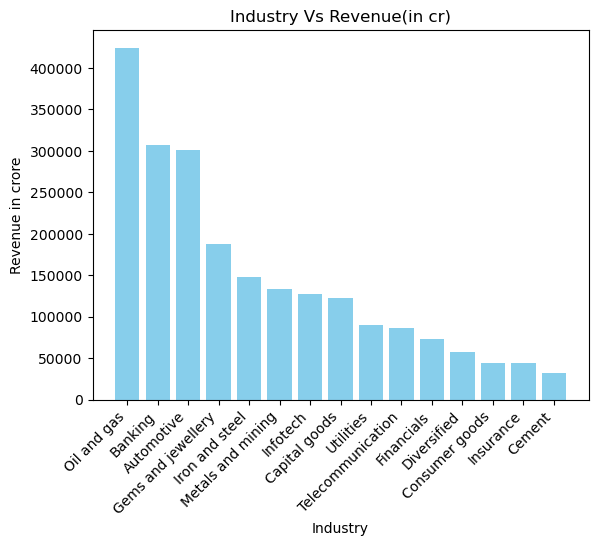

In [31]:
# Bar graph

plt.bar(df['Industry'],df['Revenue_in_crore'],color = 'skyblue')
plt.title('Industry Vs Revenue(in cr)')
plt.xlabel('Industry')
plt.ylabel('Revenue in crore')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

Text(0.5, 0, 'Revenue')

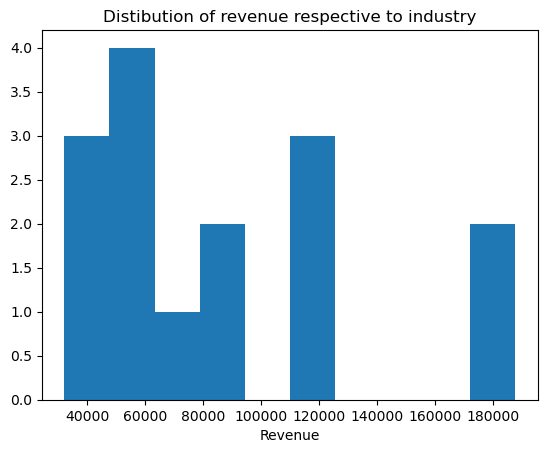

In [33]:
# Histogram

plt.hist(industry_revenue)
plt.title('Distibution of revenue respective to industry')
plt.xlabel('Revenue')

In [51]:
# Average profit in industry wise (in crore)

group_pro = df.groupby('Industry')
industry_profit = group_pro['Profits_in_crore'].mean()
industry_profit

Industry
Automotive             5939.200000
Banking                 -81.800000
Capital goods          7370.000000
Cement                 2222.000000
Consumer goods         8242.500000
Diversified            2679.000000
Financials             9498.000000
Gems and jewellery     1266.000000
Infotech              12475.800000
Insurance              3146.000000
Iron and steel         6455.666667
Metals and mining      7815.000000
Oil and gas           10700.200000
Telecommunication      4432.500000
Utilities              7073.000000
Name: Profits_in_crore, dtype: float64

In [49]:
# Applying condition for negative values

colors = ['orange' if x>=0 else 'red' for x in df['Profits_in_crore']]

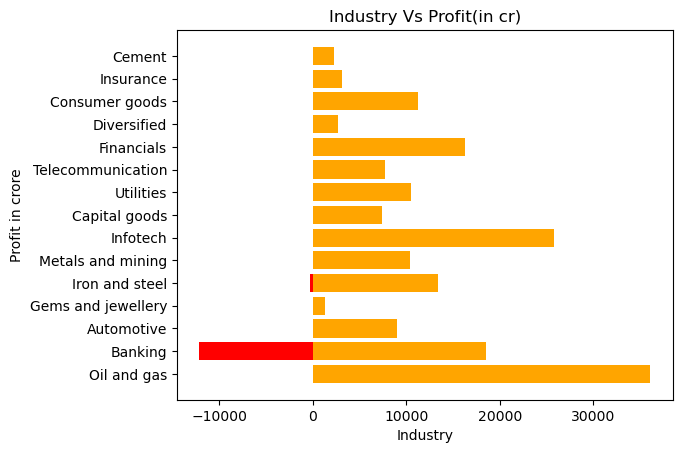

In [46]:
plt.barh(df['Industry'],df['Profits_in_crore'],color = colors)
plt.title('Industry Vs Profit(in cr)')
plt.xlabel('Industry')
plt.ylabel('Profit in crore')
plt.show()

Text(0.5, 0, 'Profit')

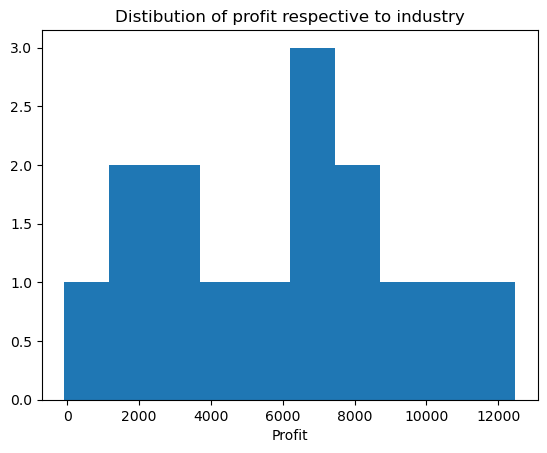

In [36]:
plt.hist(industry_profit)
plt.title('Distibution of profit respective to industry')
plt.xlabel('Profit')

In [83]:
df.columns

Index(['Rank', 'Name', 'Industry', 'Revenue_in_crore', 'Revenue growth',
       'Profits_in_crore', 'Headquarters', 'State Controlled'],
      dtype='object')

<BarContainer object of 50 artists>

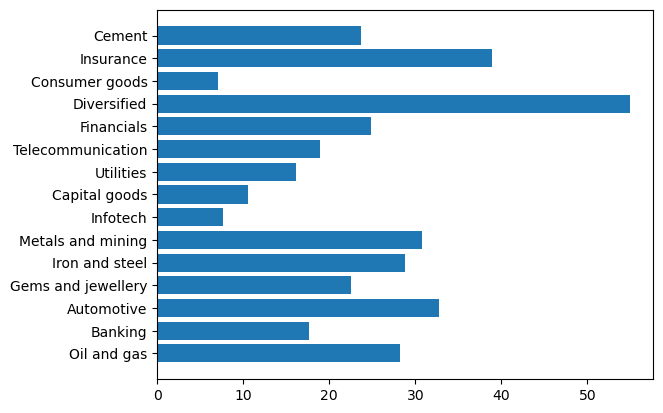

In [94]:
plt.barh(df['Industry'],df['Revenue growth'])